In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
stock = pd.read_csv('../data/high/HDFC.csv')

In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1237 non-null   object 
 1   Close   1237 non-null   float64
 2   High    1237 non-null   float64
 3   Low     1237 non-null   float64
 4   Volume  1237 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.4+ KB


In [4]:
stock.head(20)

,Date,Close,High,Low,Volume
0,26/05/16,591.63,594.45,583.13,3426390.0
1,27/05/16,593.40,595.00,588.35,1443796.0
2,30/05/16,589.88,597.50,589.05,953633.0
3,31/05/16,590.95,592.95,588.70,1378910.0
4,01/06/16,587.58,591.48,585.50,1418908.0
5,02/06/16,587.48,590.30,585.50,1977654.0
6,03/06/16,585.88,592.50,584.53,1131105.0
7,06/06/16,585.55,591.20,585.03,1386827.0
8,07/06/16,586.85,590.00,583.83,1407126.0
9,08/06/16,581.30,589.00,580.50,1185703.0


In [5]:
stock_close = stock[['Date','Close']]
stock_close = stock_close.set_index('Date')

In [6]:
ma_day = [20,50,100]

for ma in ma_day:
    column_name = "MA_%s" %(str(ma))
    stock_close[column_name] = stock_close['Close'].rolling(ma).mean()

In [7]:
stock_close['Daily Return'] = stock_close['Close'].pct_change()

In [8]:
stock_close['Volatility'] = stock_close['Daily Return'].rolling(window=252).std() * np.sqrt(252)

In [9]:
stock_close.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 26/05/16 to 26/05/21
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1237 non-null   float64
 1   MA_20         1218 non-null   float64
 2   MA_50         1188 non-null   float64
 3   MA_100        1138 non-null   float64
 4   Daily Return  1236 non-null   float64
 5   Volatility    985 non-null    float64
dtypes: float64(6)
memory usage: 67.6+ KB


In [10]:
stock_close.head(15)

,Close,MA_20,MA_50,MA_100,Daily Return,Volatility
Date,,,,,,
26/05/16,591.63,NaN,NaN,NaN,NaN,NaN
27/05/16,593.40,NaN,NaN,NaN,0.002992,NaN
30/05/16,589.88,NaN,NaN,NaN,-0.005932,NaN
31/05/16,590.95,NaN,NaN,NaN,0.001814,NaN
01/06/16,587.58,NaN,NaN,NaN,-0.005703,NaN
02/06/16,587.48,NaN,NaN,NaN,-0.000170,NaN
03/06/16,585.88,NaN,NaN,NaN,-0.002723,NaN
06/06/16,585.55,NaN,NaN,NaN,-0.000563,NaN
07/06/16,586.85,NaN,NaN,NaN,0.002220,NaN


<AxesSubplot:xlabel='Date'>

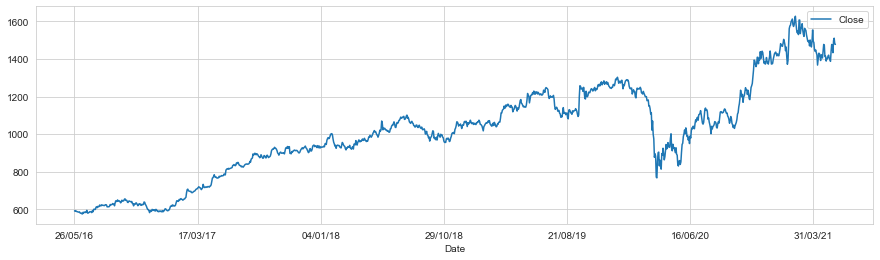

In [11]:
stock_close['Close'].plot(legend=True,figsize=(15,4))

<AxesSubplot:xlabel='Date'>

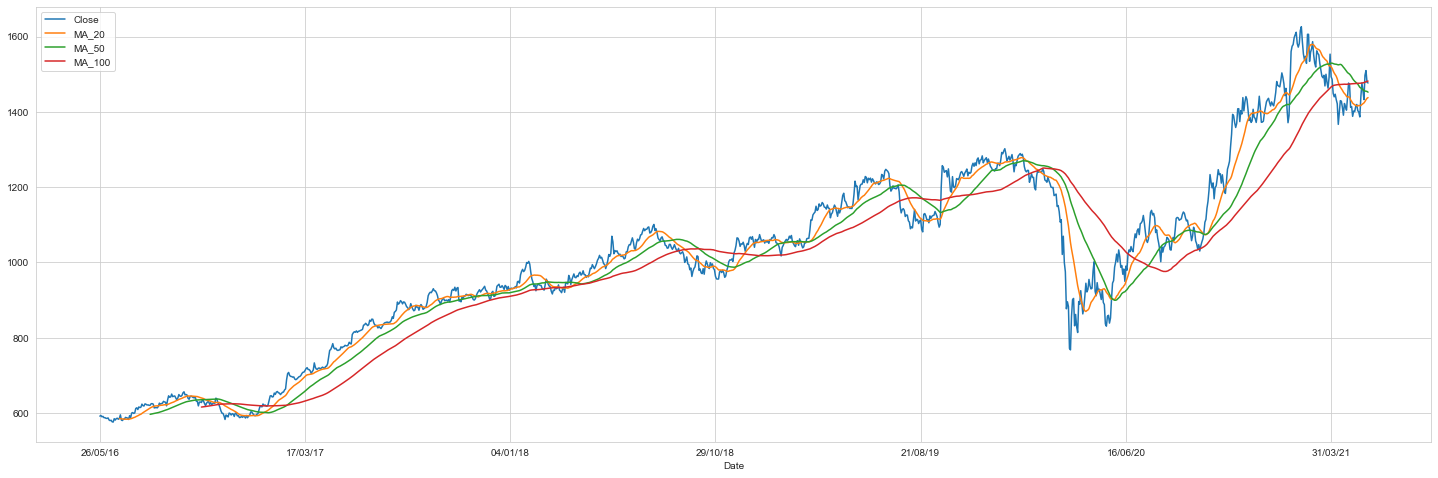

In [12]:
stock_close[['Close','MA_20','MA_50','MA_100']].plot(subplots=False,figsize=(25,8))

<AxesSubplot:xlabel='Date'>

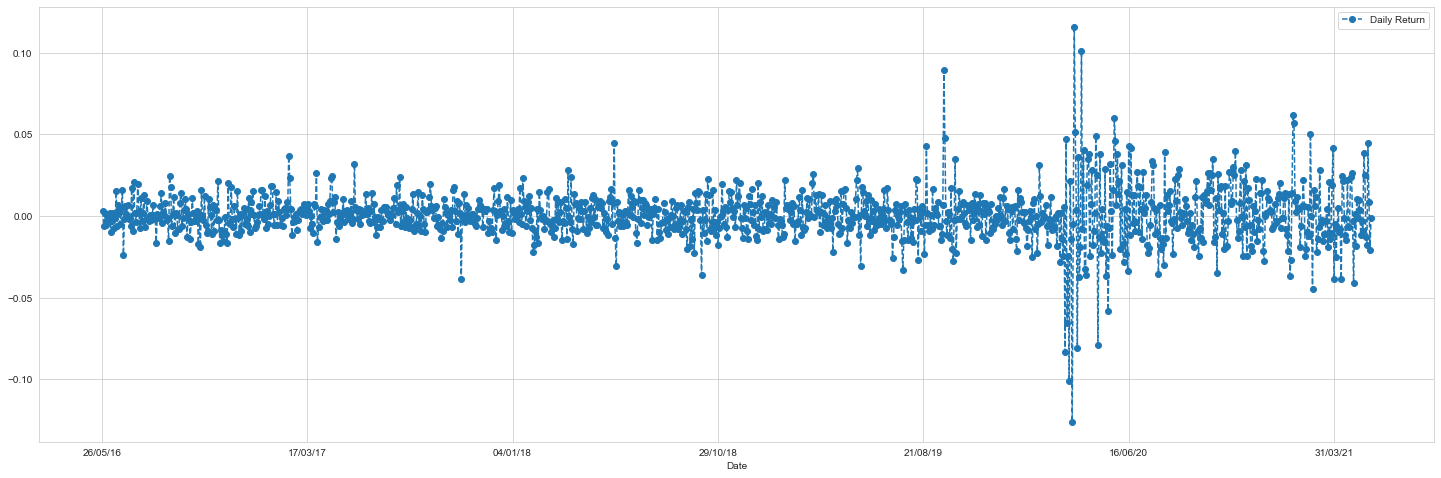

In [13]:
stock_close['Daily Return'].plot(figsize=(25,8),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

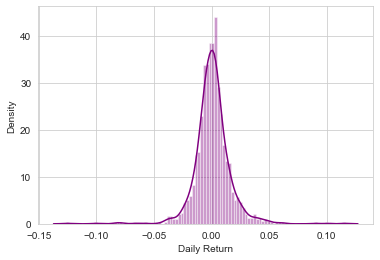

In [14]:
sns.distplot(stock_close['Daily Return'].dropna(),bins=100,color='purple')

array([<AxesSubplot:xlabel='Date'>], dtype=object)

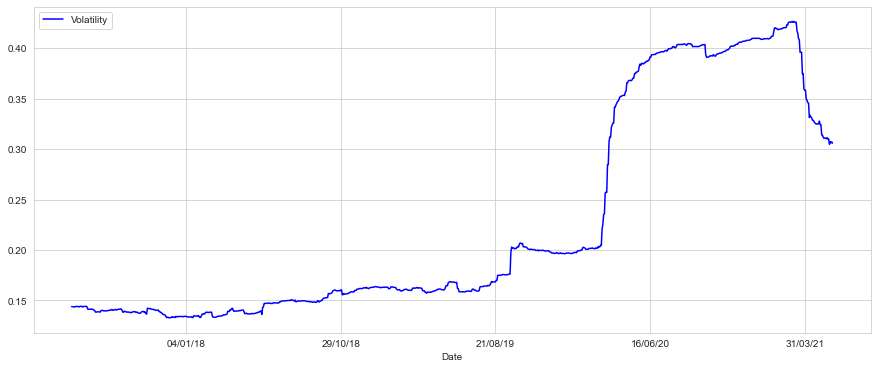

In [15]:
stock_close[['Volatility']].plot(subplots=True, color='blue',figsize=(15, 6))

In [16]:
VaR_90 = norm.ppf(1-0.9, stock_close['Daily Return'].mean(), stock_close['Daily Return'].std())
VaR_95 = norm.ppf(1-0.95, stock_close['Daily Return'].mean(), stock_close['Daily Return'].std())
VaR_99 = norm.ppf(1-0.99, stock_close['Daily Return'].mean(), stock_close['Daily Return'].std())

In [17]:
print(f"Confidence Level 90% => Value At Risk: {VaR_90}")
print(f"Confidence Level 95% => Value At Risk: {VaR_95}")
print(f"Confidence Level 99% => Value At Risk: {VaR_99}")

Confidence Level 90% => Value At Risk: -0.019109275819336972
Confidence Level 95% => Value At Risk: -0.024770864693910884
Confidence Level 99% => Value At Risk: -0.035391063853987305
